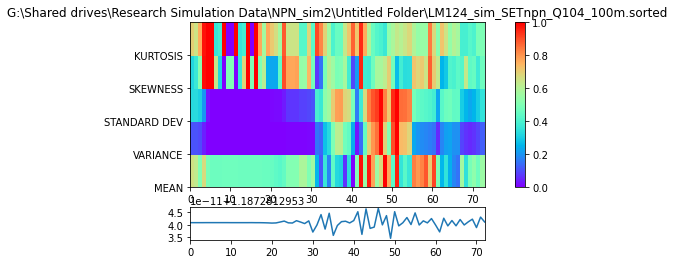

My program took 0.5523836612701416 to run


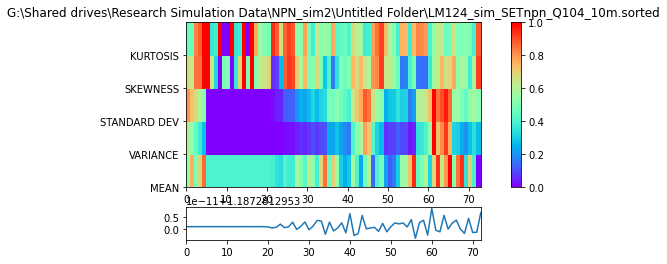

My program took 0.913916826248169 to run


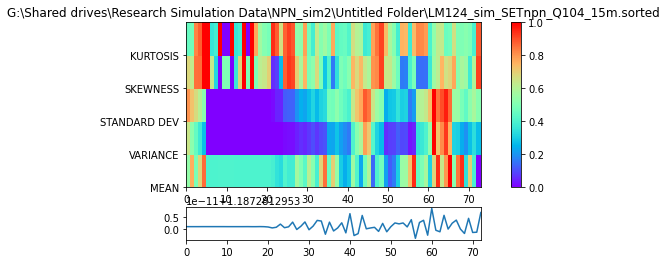

My program took 1.3705658912658691 to run


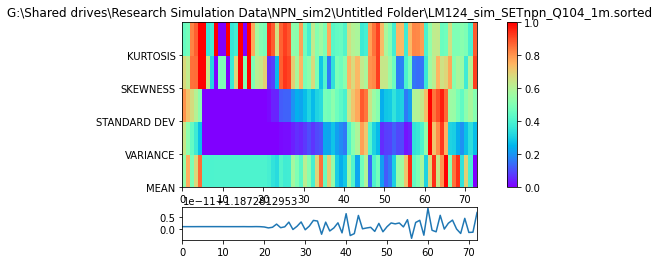

My program took 1.7611703872680664 to run


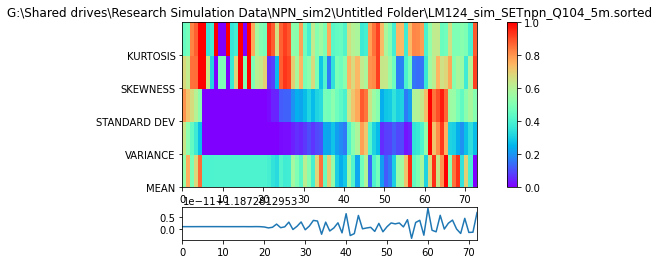

My program took 2.2049312591552734 to run


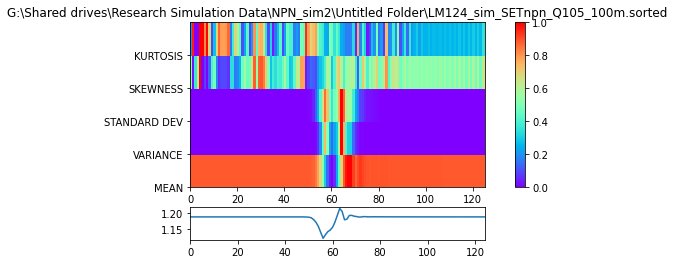

My program took 2.7871975898742676 to run


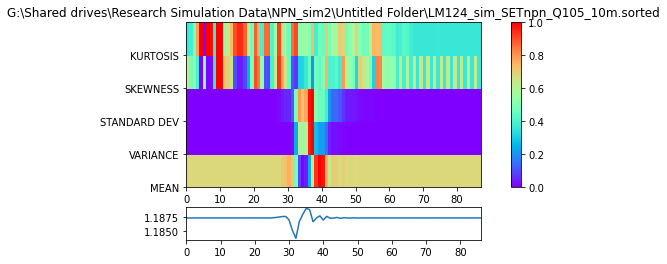

My program took 3.2720601558685303 to run


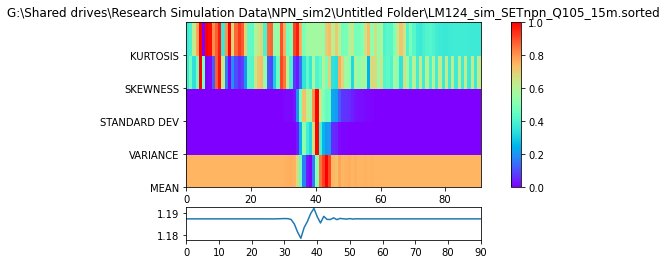

My program took 3.7251036167144775 to run


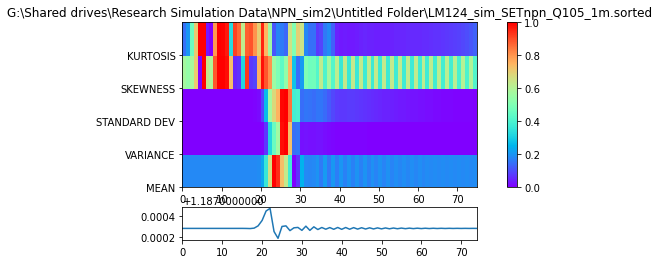

My program took 4.290976047515869 to run


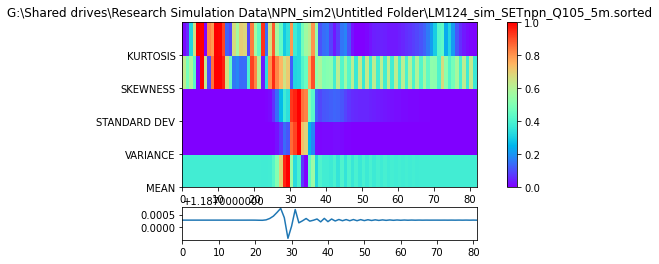

My program took 4.703530311584473 to run


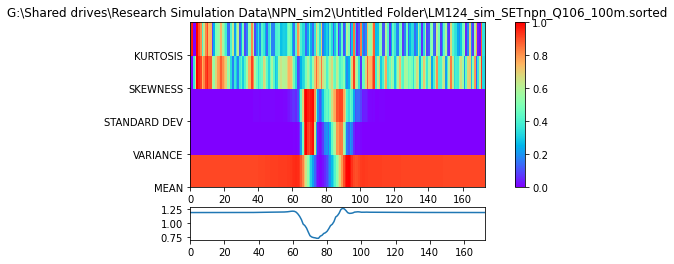

My program took 5.165090799331665 to run


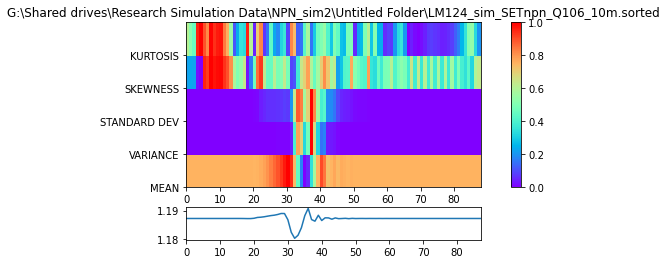

My program took 5.5798609256744385 to run


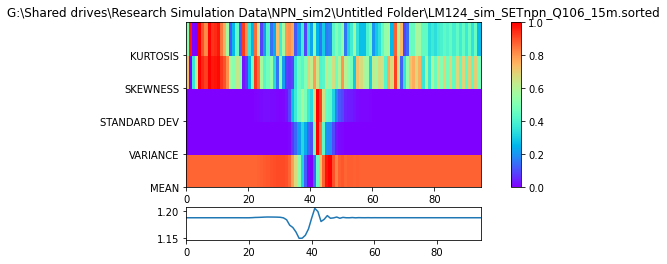

My program took 5.931399345397949 to run


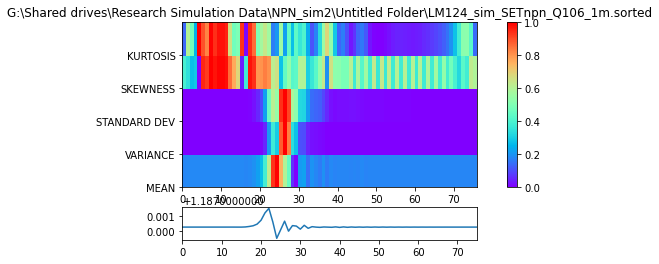

My program took 6.290654897689819 to run


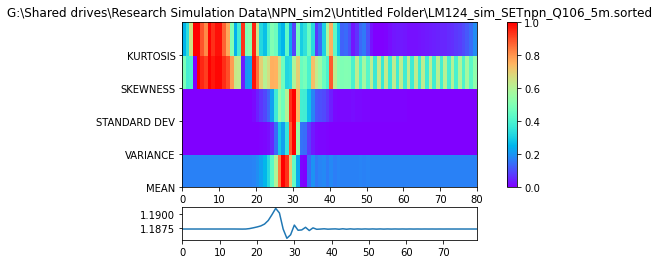

My program took 6.674795627593994 to run


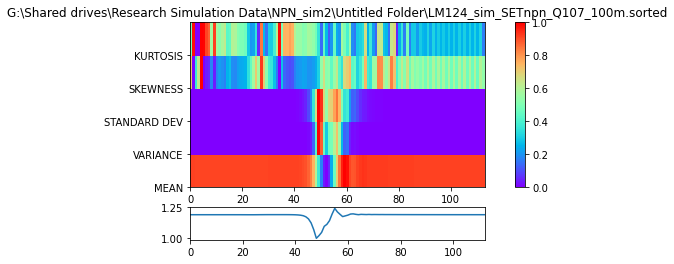

My program took 7.028846979141235 to run


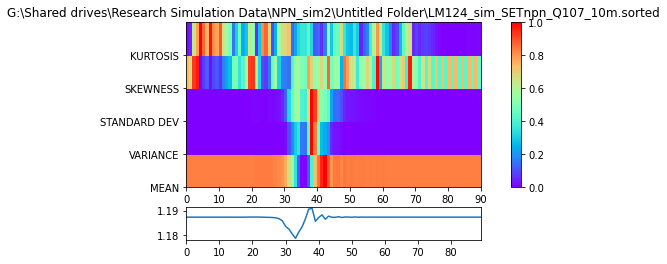

My program took 7.514573335647583 to run


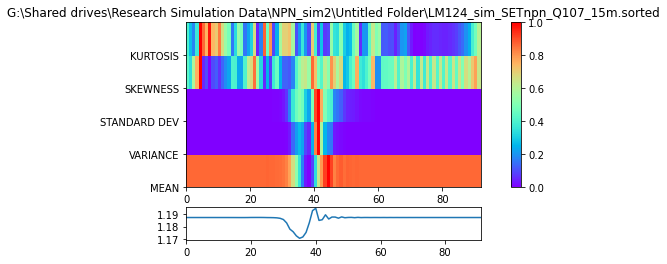

My program took 7.863743782043457 to run


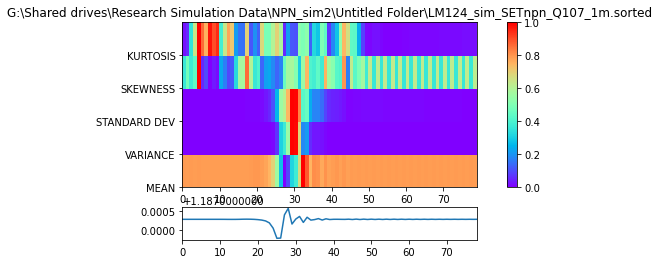

My program took 8.214935064315796 to run


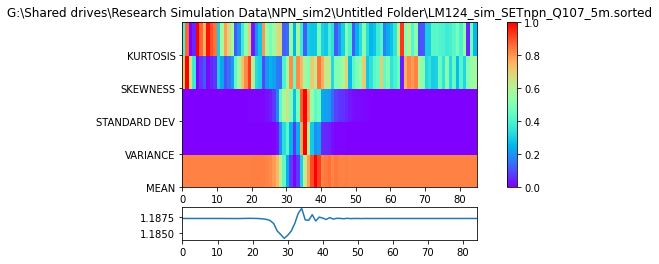

My program took 8.59460973739624 to run


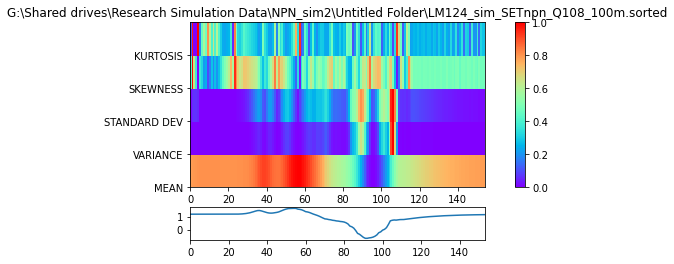

My program took 8.949699640274048 to run


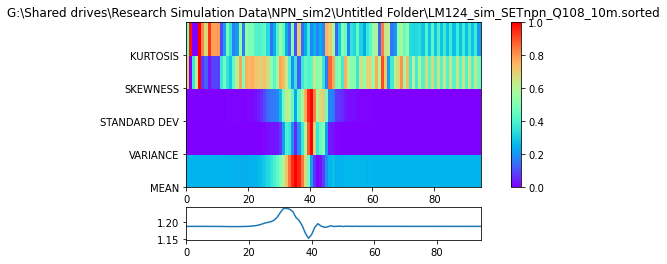

My program took 9.433242559432983 to run


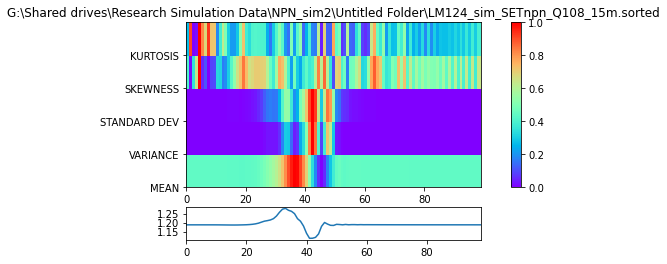

My program took 9.866275787353516 to run


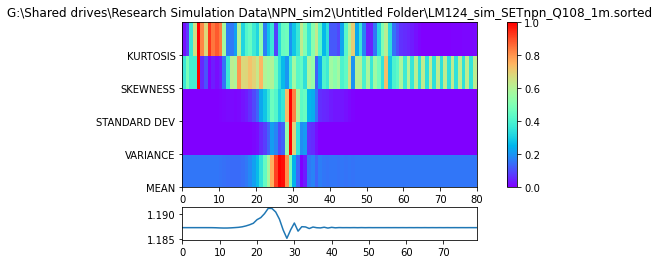

My program took 10.409522294998169 to run


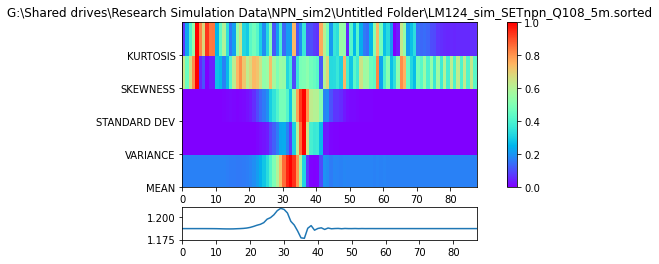

My program took 10.888251304626465 to run


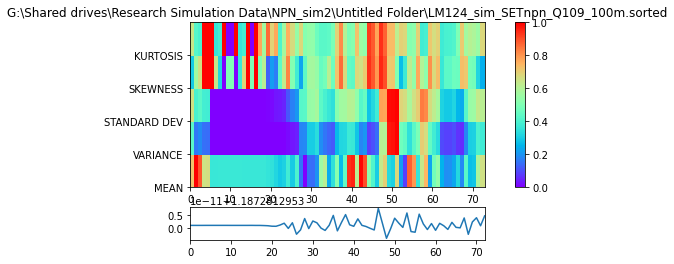

My program took 11.348598957061768 to run


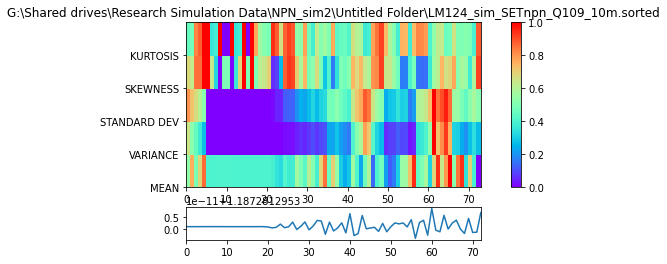

My program took 11.734534978866577 to run


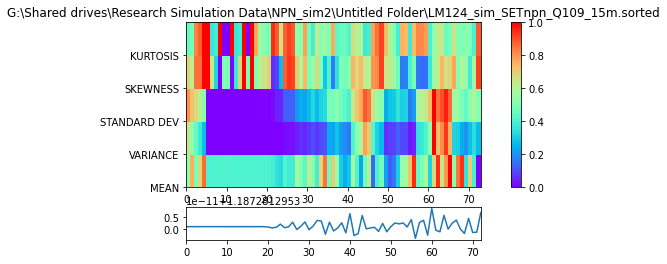

My program took 12.203768730163574 to run


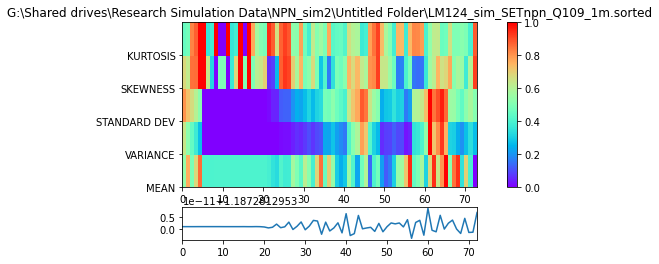

My program took 12.593333721160889 to run


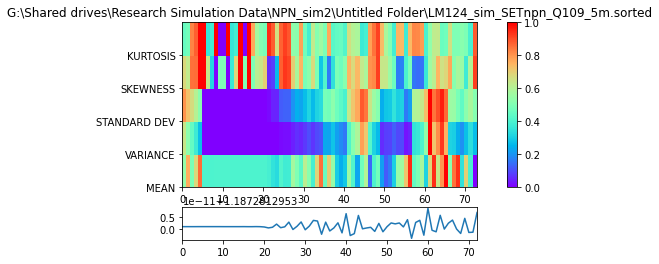

My program took 12.945358991622925 to run


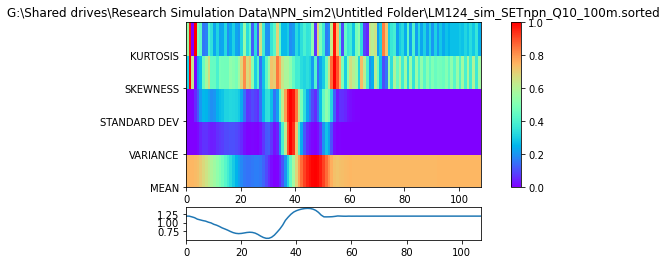

My program took 13.285236597061157 to run


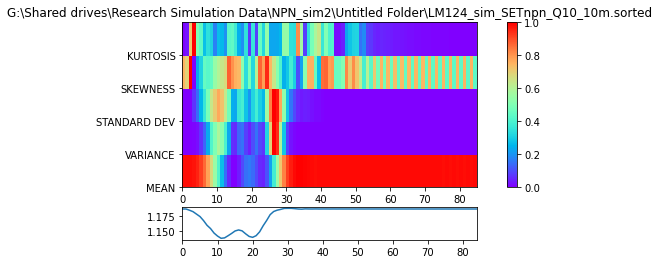

My program took 13.66849660873413 to run


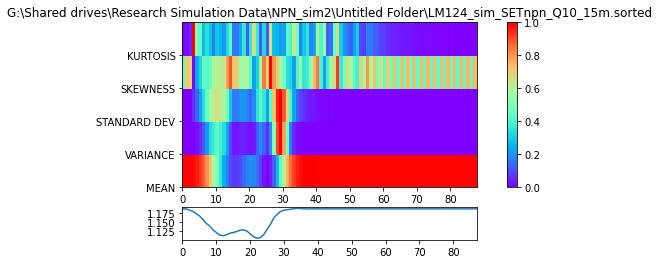

My program took 14.135371208190918 to run


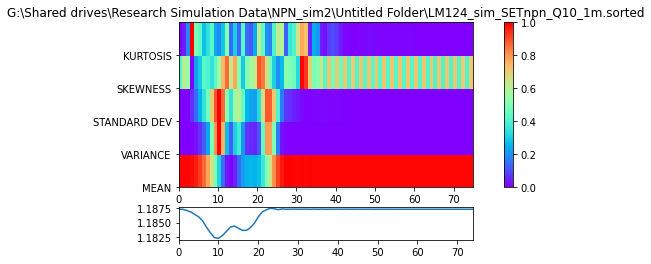

My program took 14.617948055267334 to run


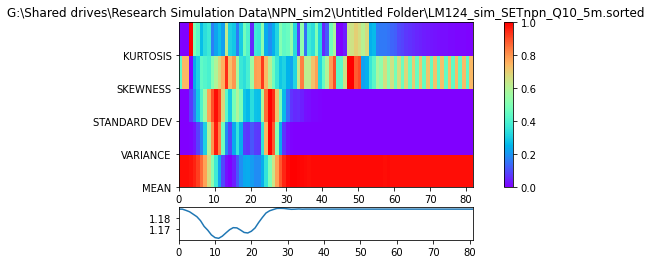

My program took 15.121858835220337 to run


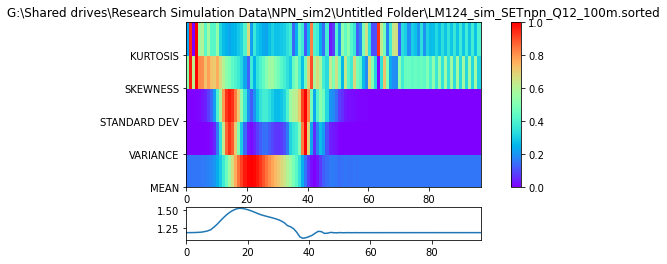

My program took 15.586621046066284 to run


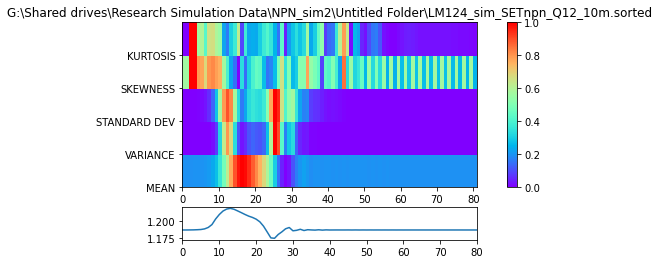

My program took 16.08208417892456 to run


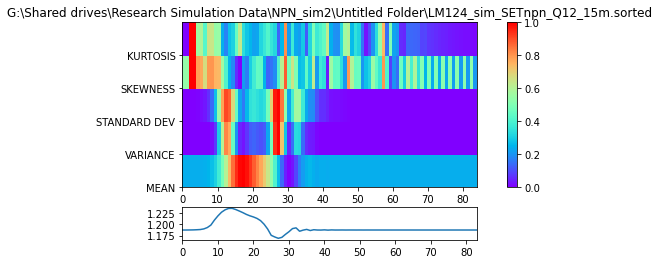

My program took 16.532350063323975 to run


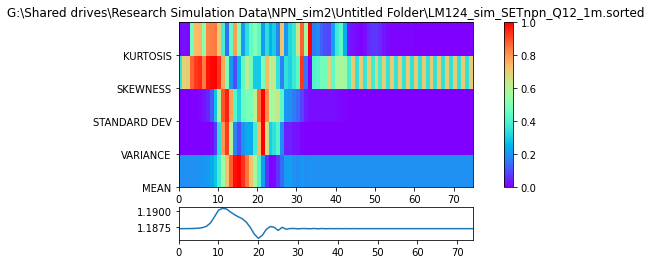

My program took 17.007691383361816 to run


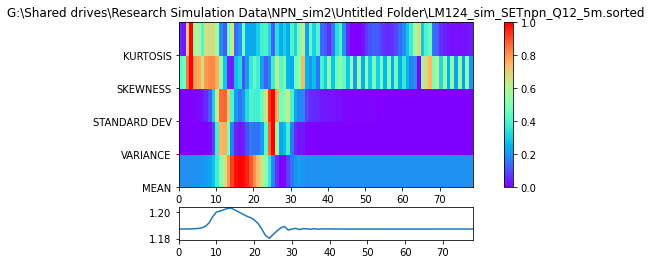

My program took 17.52680468559265 to run


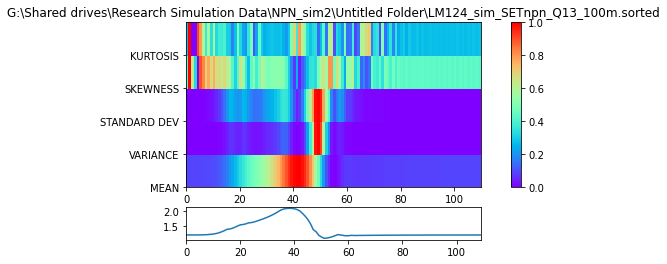

My program took 17.961779832839966 to run


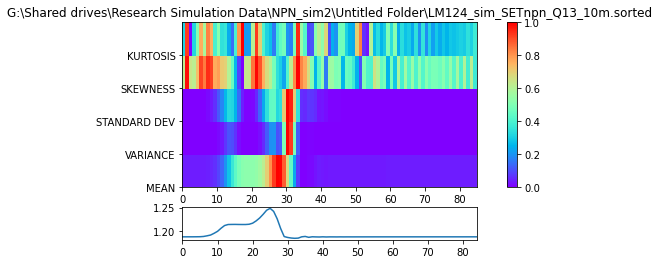

My program took 18.376768589019775 to run


KeyboardInterrupt: 

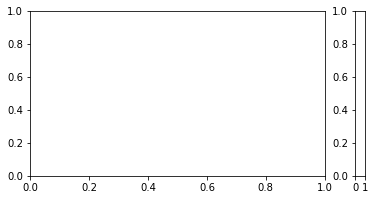

In [1]:
import glob
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from ipywidgets import interactive
#import statistics as st
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn import preprocessing
def vectorized_stride_v2(array, clearing_time_index, max_time, sub_window_size,
                         stride_size):
    start = clearing_time_index + 1 - sub_window_size - 1
    
    sub_windows = (
        start + 
        np.expand_dims(np.arange(sub_window_size), 0) +
        np.expand_dims(np.arange(max_time + 1, step=stride_size), 0) .T
    )
    
    Mean = np.mean(array[sub_windows,0], +1)
    M = np.array([Mean])
   # M_norm = np.linalg.norm(M)
   # M = M/M_norm
    Var = np.var(array[sub_windows,0], +1)
    V = np.array([Var])
    #V_norm = np.linalg.norm(V)
   # V = V/V_norm
    St_Dev = np.std(array[sub_windows,0], +1)
    SD = np.array([St_Dev])
   # SD_norm = np.linalg.norm(SD)
   # SD = SD/SD_norm
    Skew = skew(array[sub_windows,0], +1)
    S = np.array([Skew])
    #S_norm = np.linalg.norm(S)
   # S = S/S_norm
    Kur =  kurtosis(array[sub_windows,0], +1)
    K = np.array([Kur])
   # K_norm = np.linalg.norm(K)
   # K = K/K_norm
    m = np.concatenate([M, V, SD, S, K])
    for i in range (len(m)):
        offset = [min(m[i])] * len(m[i])
        m[i] = (m[i]-offset)
        norm = [max(m[i])]*len(m[i])
        m[i] = m[i]/norm
    m = m .T
    return  m

start_time = time.time()
filenames = sorted(glob.glob('G:\Shared drives\Research Simulation Data\\NPN_sim2\\Untitled Folder\LM124_sim_SETnpn_*.sorted')) #change file name  
filenames = filenames[0:400]
for filename in filenames:
    D = np.loadtxt(fname=filename,dtype=np.float64)
    cols = ["val", "time", "vout", "vin"]
    df = pd.DataFrame(D,columns=cols)
    y = df[['vout']]
    max_val = max(df['val'])
    max_val = int(max_val)
    df = df.drop(columns=['vin', 'time', 'val'])
    df = df.to_numpy()
    b = vectorized_stride_v2(df, 0, max_val, 5, 1)

#def plotting (sub_window_size = 10000, stride_size = 1000):    
    #b = np.array(b)
    #print(b)
    cols = ['MEAN', 'VARIANCE', 'STANDARD DEV', 'SKEWNESS', 'KURTOSIS']
    dk = pd.DataFrame(b, columns=cols)
    #print(dk)
    #dk = dk.to_numpy()
    grid = dict(width_ratios=[30,1],height_ratios=[5,1])
    fig,ax = plt.subplots(2,2,gridspec_kw=grid)
    cm = ax[0][0].pcolor(dk.T, cmap = 'rainbow')
    ax[1][0].plot(y)
    ax[1][0].margins(x=0)
    ax[1][1].axis('off')
    ax[0][0].set_yticks(range(len(dk.columns)))
    ax[0][0].set_yticklabels(dk.columns)
    ax[0][0].set_title(filename)
    #plt.xticks(range(len(dk.index)), dk.index)
   # ax1.set_yticks(range(len(dk.columns)), dk.columns)
    #plt.figure(figsize=(5, 10))
    plt.colorbar(cm,cax=ax[0][1],ax=ax[0][0])
    plt.show()
    #interactive_plot = interactive (plotting, sub_window_size = (10,100000,100) , stride_size = (10,100000,100) )

    #print (dk)
    print ("My program took", time.time() - start_time, "to run")
#interactive_plotimport glob